### Установка библиотек

`!pip install ` *название*

Если какие-то библиотеки не установлены, прежде чем импортировать, нужно установить этим способом

In [ ]:
# !pip install pymorphy2
# !pip install pandas
# !pip install re

In [2]:
import pandas as pd #работа с датафреймами- таблицами
import pymorphy2 as pm #части речи, формы
import re #регулярные выражения

### Разделение текста на слова

Чтение csv файла с разделителем ","
Для разделителя ; - укажите в скобках через запятую 
`sep=';'`

In [17]:
df = pd.read_csv('text.csv')

`sample` - для показа рандомных строк для `n` числа, есть также `head` для первых строк

In [18]:
df.sample(5)

,text,place_id
84,Быстрое обслуживание\r\nВторой зал очень классный,ChIJA_AwTgs7lkYRT44RIg8Wob8
77,"Дешево и сердито, в полночь приходит много нос...",ChIJA_AwTgs7lkYRT44RIg8Wob8
0,Обслуживание ужасное. Размена нет. Мне отказал...,ChIJHxOBRgo7lkYR78K4CG41kKU
32,Все супер,ChIJA_AwTgs7lkYRT44RIg8Wob8
48,Все великолепно,ChIJA_AwTgs7lkYRT44RIg8Wob8


In [186]:
# разделяем на слова с помощью регулярных выражений
words = df.text.str.extractall(r"(\S+ *)").reset_index()

In [187]:
# переименовываем колонки
words.rename(columns = {'level_0':'index_review', 0:'word'}, inplace = True)

In [188]:
# все буквы в словах делаем строчными
words.word = words.word.str.lower()

In [189]:
words

,index_review,match,word
0,0,0,обслуживание
1,0,1,ужасное.
2,0,2,размена
3,0,3,нет.
4,0,4,мне
...,...,...,...
1085,84,1,обслуживание
1086,84,2,второй
1087,84,3,зал
1088,84,4,очень


In [190]:
# создание новых столбцов, в нашем случае - индекса отзывов, 
# чтобы по этому индексу мы могли идентифицировать пренадлежность слов ко всем полям df
df['index_review']= df.index

In [191]:
df

,text,place_id,index_review
0,Обслуживание ужасное. Размена нет. Мне отказал...,ChIJHxOBRgo7lkYR78K4CG41kKU,0
1,В этой аптеке не знают законов о защите прав п...,ChIJY_BLUac7lkYR2b3L0quVx4w,1
2,Не очень удобное расположение в торговом компл...,ChIJHxOBRgo7lkYR78K4CG41kKU,2
3,Хороший зоомагазин,ChIJmwCcQQo7lkYRPUnfYbHZC_I,3
4,"Отличное место, где можно не дорого посидеть, ...",ChIJ-SCGPwo7lkYR665Y6H8-Q4k,4
...,...,...,...
80,"Заведения на высшем уровне, готовят быстро и в...",ChIJA_AwTgs7lkYRT44RIg8Wob8,80
81,"Очень уютная атмосфера, вкусные коктейли по до...",ChIJA_AwTgs7lkYRT44RIg8Wob8,81
82,Очень вкусный бизнес-ланч. Рекомендую.,ChIJA_AwTgs7lkYRT44RIg8Wob8,82
83,Мне рассказали про вкусный шашлыки я решила пр...,ChIJA_AwTgs7lkYRT44RIg8Wob8,83


In [192]:
# присоединение датафрейма по полю индекса отзывов
words = words.merge(df, on = 'index_review', how = 'left')

In [193]:
# удаляем лишние символы, оставляя только слова
chars_to_remove = ['\r', '\n', '.', ')', '!', '(', ',', '-', ':', '?', '/', '"', ';']
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'
words.word = words.word.str.replace(regular_expression, '')

### Фильтрация датафрейма по условию

`df.loc[df.поле > 0]`

Применяется к датафрейму. В скобках квадратных указывается название поля в виде как выше (через точку) или `df['поле']`. Далее идет оператор и значение. 

Для равенства используется `==`.

Для вхождения в список `.isin(list)`, где list - это перечисление значений через запятую в `[]`. Если проверка на невхождение, то: `df.loc[~df.поле.isin(list)]`

`.loc` также может вернуть значение по строке и столбцу, на первом месте указывается номер строки, на втором название поля в кавычках.

In [194]:
# преобразование слов в начальную форму с наименованием частей речи
morph = pm.MorphAnalyzer()

for i, r in words.iterrows():
    word = r['word'].strip()
    m = morph.parse(word)[0]
    words.loc[i, 'normal_form'] = m.normal_form
    words.loc[i, 'tag'] = m.tag
    words.loc[i, 'grammema'] = m.tag.POS

In [195]:
words.sample(5)

,index_review,match,word,text,place_id,normal_form,tag,grammema
133,8,14,администрации,"Отремонтировать неплохо было бы, монтажной пен...",ChIJ6409RAo7lkYRJqPM_TWufrQ,администрация,"NOUN,inan,femn sing,gent",NOUN
275,18,22,разочаровались,"Данное заведение рядом с домом, поэтому период...",ChIJA_AwTgs7lkYRT44RIg8Wob8,разочароваться,"VERB,perf,intr plur,past,indc",VERB
438,31,0,хорошое,"Хорошое заведение,отличный алкоголь,не плохие ...",ChIJA_AwTgs7lkYRT44RIg8Wob8,хорошоя,"NOUN,anim,femn,Name sing,datv",NOUN
784,56,1,не,Совершенно не понравилось данное заведение. За...,ChIJA_AwTgs7lkYRT44RIg8Wob8,не,PRCL,PRCL
171,13,9,шкавчики,Хорошие условия. Причтные люди. Народу не очен...,ChIJmwCcQQo7lkYRnNUNbJycctE,шкавчик,"NOUN,anim,masc,Name plur,nomn",NOUN


In [196]:
# получаем отзывы, состоящие из слов в начальной форме для дальнейшего семантического анализа
sentens = words.groupby('index_review').agg({'normal_form': lambda x: ' '.join(x)}).reset_index().rename(columns = 
                                                                                               {'normal_form':'normal_sentens'})

In [197]:
# присоединяем их к основному датасету
words = words.merge(sentens)

https://pymorphy2.readthedocs.io/en/latest/user/grammemes.html#grammeme-docs - обозачения для граммем

### Биграммы

Пара слов, стоящих рядом в предложении

In [118]:
import nltk

In [176]:
# только нормальные граммемы
g = ['NOUN','ADJF', 'ADJS', 'COMP','VERB', 'INFN', 'PRTF', 'PRTS', 'GRND', 'ADVB']

In [175]:
# формирование датасета биграмм
bigs  = []
for i, r in words.iterrows():
    s = re.sub("[^\w]", " ", r['normal_sentens'])
    bigrm = nltk.bigrams(s.lower().split(" "))
    for l in list(bigrm):
        if l[0] != '' and l[1]!='':
            m = morph.parse(l[0])[0].tag.POS
            m2 = morph.parse(l[1])[0].tag.POS
            if str(m) in g and str(m2) in g:
                bigs.extend([[r.index_review, l, l[0], l[1], m, m2]])
bigs_df = pd.DataFrame(bigs).rename(columns = {0:'index_review', 1:'bigramm', 2:'word1', 3:'word2', 4:'tag1', 5:'tag2'})

In [152]:
bigs_df

,index_review,bigramm,word1,word2,tag1,tag2
0,0,"(обслуживание, ужасный)",обслуживание,ужасный,NOUN,ADJF
1,0,"(ужасный, размен)",ужасный,размен,ADJF,NOUN
2,0,"(покупка, лекарство)",покупка,лекарство,NOUN,NOUN
3,0,"(лекарство, потому)",лекарство,потому,NOUN,ADVB
4,0,"(быть, сдача)",быть,сдача,INFN,NOUN
...,...,...,...,...,...,...
11839,84,"(зал, очень)",зал,очень,NOUN,ADVB
11840,84,"(очень, классный)",очень,классный,ADVB,ADJF
11841,84,"(быстрый, обслуживание)",быстрый,обслуживание,ADJF,NOUN
11842,84,"(зал, очень)",зал,очень,NOUN,ADVB


### Семантический анализ

In [199]:
# код для семантического анализа

import re
import os
import csv
from collections import defaultdict


class Sentimental(object):
    def __init__(self, word_list=None, negation=None):
        self.word_list = {}
        self.negations = set()

        for wl_filename in self.__to_arg_list(word_list):
            self.load_word_list(wl_filename)
        for negations_filename in self.__to_arg_list(negation):
            self.load_neagations(negations_filename)

        self.__negation_skip = {'a', 'an', 'so', 'too', 'я', 'мне'}

    @staticmethod
    def __to_arg_list(obj):
        if obj is not None:
            if not isinstance(obj, list):
                obj = [obj]
        else:
            obj = []
        return obj

    def __is_prefixed_by_negation(self, token_idx, tokens):
        #   True if i != 0 and tokens[i - 1] in self.negations else False
        prev_idx = token_idx - 1
        if tokens[prev_idx] in self.__negation_skip:
            prev_idx -= 1

        is_prefixed = False
        if token_idx > 0 and prev_idx >= 0 and tokens[prev_idx] in self.negations:
            is_prefixed = True

        return is_prefixed

    def load_neagations(self, filename):
        with open(filename,'r', encoding='utf-8') as f:
            reader = csv.DictReader(f)
            negations = set([row['token'] for row in reader])
        self.negations |= negations

    def load_word_list(self, filename):
        with open(filename, 'r', encoding='utf-8') as f:
            reader = csv.DictReader(f)
            word_list = {row['word']: float(row['score']) for row in reader}
        self.word_list.update(word_list)

    def analyze(self, sentence):
        sentence_clean = re.sub(r'[^\w ]', ' ', sentence.lower())
        tokens = sentence_clean.split()

        scores = defaultdict(float)
        words = defaultdict(list)
        comparative = 0

        for i, token in enumerate(tokens):
            is_prefixed_by_negation = self.__is_prefixed_by_negation(i, tokens)
            if token in self.word_list and not is_prefixed_by_negation:
                score = self.word_list[token]

                score_type = 'negative' if score < 0 else 'positive'
                scores[score_type] += score
                words[score_type].append(token)

        if len(tokens) > 0:
            comparative = (scores['positive'] + scores['negative']) / len(tokens)

        result = {
            'score': scores['positive'] + scores['negative'],
            'positive': scores['positive'],
            'negative': scores['negative'],
            'comparative': comparative,
        }

        return result

- Score - сумма positive и negative
- Positive - сумма значений позитивных слов, встретившихся в тексте
- Negative - сумма значений негативных слов, встретившихся в тексте
- Comarative - Score деленное на количество слов, по которым определялся сентимент

In [200]:
# в параметры Sentimental() необходимо передать нужные листы слов
# в основной датасет добавляется значения сентиментов
sent = Sentimental(word_list=['word_list/afinn.csv', 'word_list/russian.csv'], negation='word_list/negations.csv')
n = []
c = []
sen = []
pos, neg = [], []
for s in words.normal_sentens:
    analyze = sent.analyze(s)
    n.append(analyze.get('score'))
    pos.append(analyze.get('positive'))
    neg.append(analyze.get('negative'))
    c.append(analyze.get('comparative'))
    sen.append(analyze)
words['pos'] = pos
words['neg'] = neg
words['score'] = n
words['comparative'] = c
words['sentiments'] = sen

In [166]:
words[['text', 'score']].sample(5)

,text,score
992,Замечательно прошел корпоратив.,5.0
155,"На фитнес зал не тянет, но есть все необходимое)",0.0
183,Хорошие условия. Причтные люди. Народу не очен...,5.0
840,Больши 3не заслуживает.1помещение большое но н...,-5.0
1011,"Заведения на высшем уровне, готовят быстро и в...",15.0


### Облака слов и Частотный анализ

In [155]:
import matplotlib.pyplot as plt
import wordcloud

In [122]:
# grammemas = ['PREP', 'CONJ', 'PRCL', 'INTJ']
# norm_words = words.loc[~words.grammema.isin(grammemas)]

# # либо

# g = ['NOUN','ADJF', 'ADJS', 'COMP','VERB', 'INFN', 'PRTF', 'PRTS', 'GRND', 'ADVB']
# norm_words = words.loc[words.grammema.isin(g)]

In [124]:
# stop = ['весь', 'можно', 'много', 'быть',"сам", "тут",'там',"уже", "раз", "свой","наш", "мочь",'где', "мой",'один','здесь','который', 'этот', 'мало', 'тот', 'такой', "ещё", "еще", "всегда"]

In [179]:
# функция для рисования облака слов
def get_cloud(words_list):
    stop = ["который", "какой", "такой", "тот", "если", "тогда", "этот", "другой", "также", "чтобы", "быть", "мочь", "свой", "весь", "один"]

    wc = wordcloud.WordCloud(collocations=True, 
                             background_color = 'white', 
                             width=1600, 
                             height=800, 
                             min_word_length=4, 
                             stopwords= stop).generate(" ".join(words_list))

    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

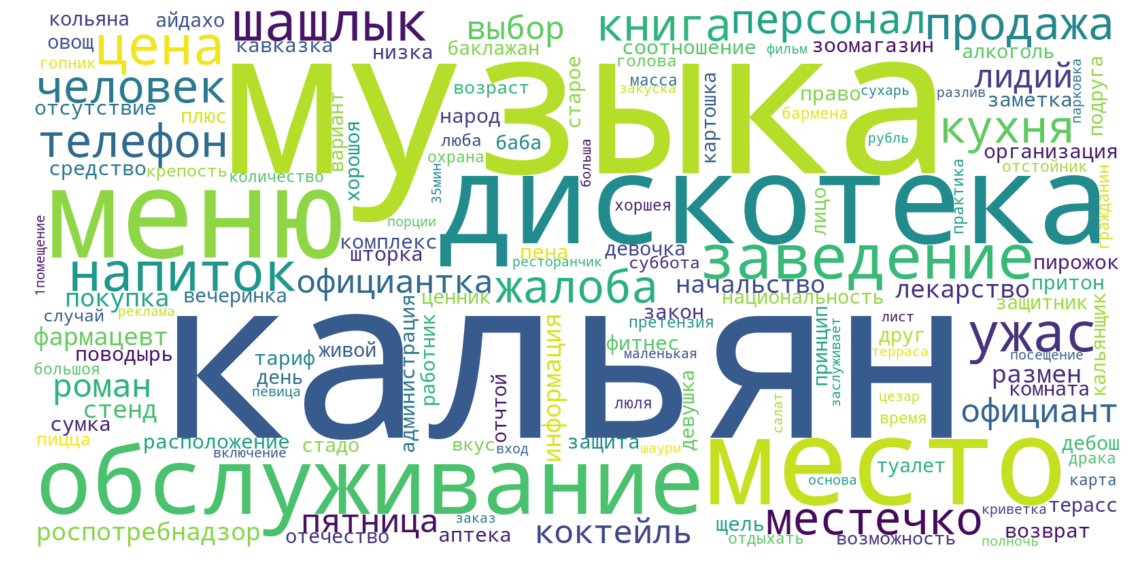

In [180]:
# облако слов по существительным
get_cloud(words.loc[words.grammema == 'NOUN'].normal_form.to_list())

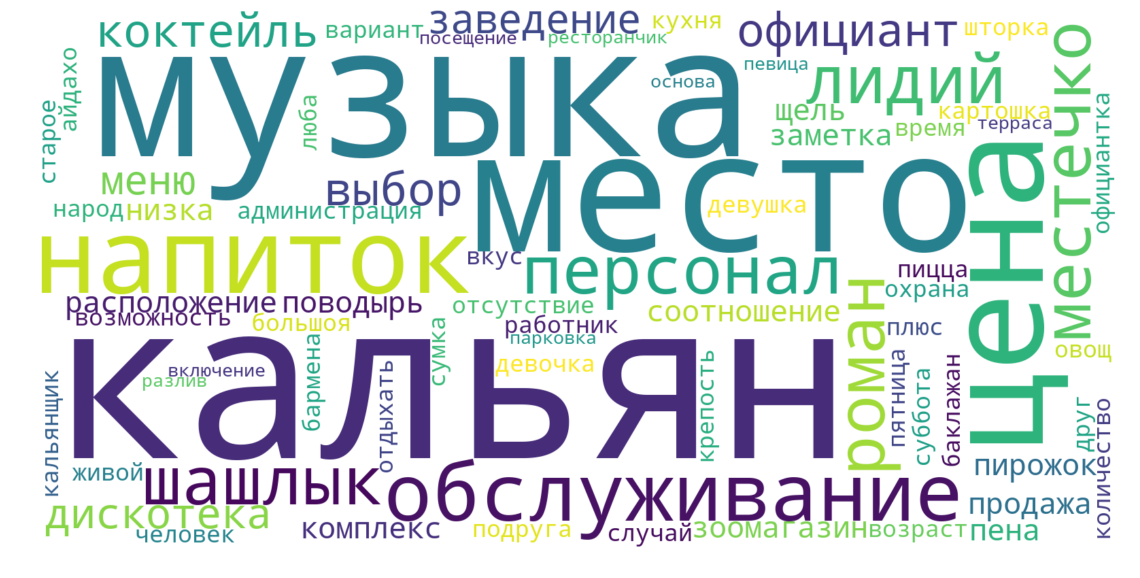

In [181]:
# облако слов по существительным, встречаемых в предложениях с позитивной тональностью
get_cloud(words.loc[words.grammema == 'NOUN'].loc[words.score>0].normal_form.to_list())

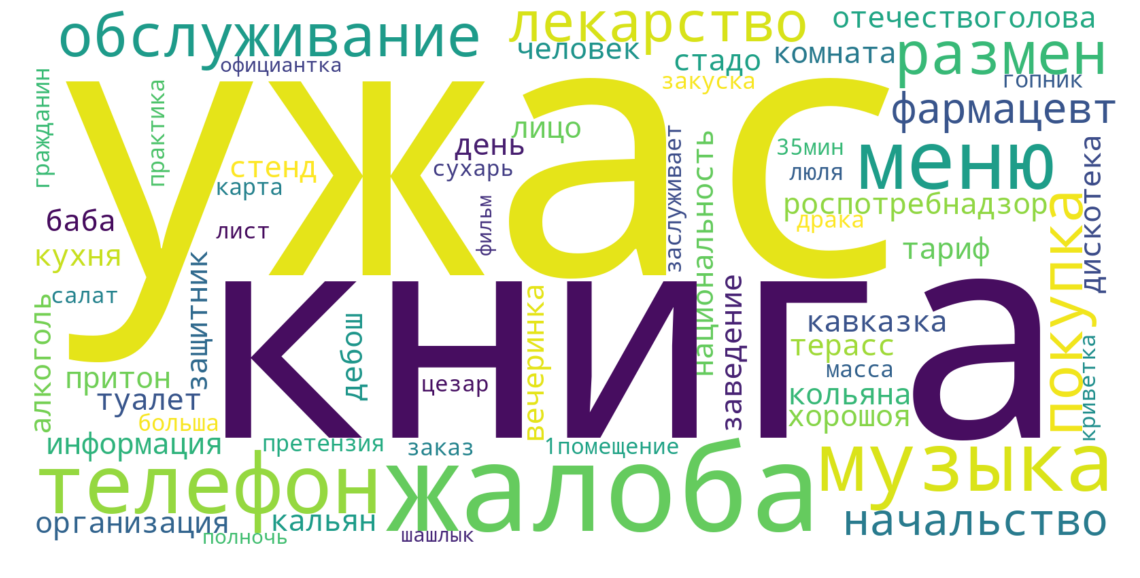

In [182]:
# облако слов существительных с негативной тональностью
get_cloud(words.loc[words.grammema == 'NOUN'].loc[words.score<0].normal_form.to_list())

### Количественная и качественная характеристики

In [210]:
words.loc[words.grammema.isin(g)].loc[words.score > 0].groupby('normal_form')[['index_review']].count().sort_values(
    by = 'index_review', ascending = False).reset_index()

,normal_form,index_review
0,очень,15
1,вкусный,13
2,кальян,12
3,хороший,11
4,весь,11
...,...,...
301,администратор,1
302,основа,1
303,особенно,1
304,оставить,1


In [212]:
words.loc[words.grammema.isin(g)].loc[words.score > 0].groupby('normal_form')[['score']].sum().sort_values(
    by = 'score', ascending = False).reset_index()

,normal_form,score
0,вкусный,230.7
1,очень,214.9
2,кальян,194.1
3,заведение,174.8
4,хороший,166.7
...,...,...
301,отсутствие,5.0
302,отремонтировать,5.0
303,лично,5.0
304,плохой,3.3


Запишите в переменную, если нужно

### Сохранение файлов

Чтобы сохранить такие датафреймы - через точку добавьте `to_csv('name.csv', index = False)`

In [161]:
bigs_df.merge(words[['index_review', 'score']]).to_csv('bigramms.csv', index = False)

In [163]:
words.to_csv('words.csv', index = False)